In [1]:
with open('files/names.txt') as f:
    names = f.readlines()
names = [i.strip() for i in names]

names[:5]

['元柏民', '任铭', '游连连', '门玮翔', '侯光鸿']

In [2]:
import json

addresses = json.load(open('files/address.json'))

addresses[:2]

[{'北京市': ['东城区',
   '西城区',
   '朝阳区',
   '丰台区',
   '石景山区',
   '海淀区',
   '门头沟区',
   '房山区',
   '通州区',
   '顺义区',
   '昌平区',
   '大兴区',
   '怀柔区',
   '平谷区',
   '密云区',
   '延庆区']},
 {'天津市': ['河西区',
   '和平区',
   '河东区',
   '南开区',
   '河北区',
   '红桥区',
   '东丽区',
   '西青区',
   '津南区',
   '北辰区',
   '武清区',
   '宝坻区',
   '滨海新区',
   '宁河区',
   '静海区',
   '蓟州区']}]

In [3]:
import random


def random_address(add, node):
    if type(node) == list and (type(node[0]) == str):
        return add + random.choice(node)

    if type(node) == list:
        node = random.choice(node)

    if type(node) == str:
        return add + node

    key = random.choice(list(node.keys()))

    add += key

    return random_address(add, node[key])


random_address('', addresses)

'新疆维吾尔自治区可克达拉市'

In [4]:
def gen_text():
    name = random.choice(names)
    gender = random.choice(['男', '女'])
    race = '汉'
    year = random.randint(1960, 2010)
    month = random.randint(1, 12)
    day = random.randint(1, 31)
    address = random_address('', addresses)[:16]
    number = str(random.randint(100000, 999999))

    month_s = str(month)
    if len(month_s) == 1:
        month_s = '0' + month_s

    day_s = str(day)
    if len(day_s) == 1:
        day_s = '0' + day_s

    number = number + str(year) + month_s + day_s + str(
        random.randint(1000, 9999))

    return name, gender, race, year, month, day, address, number


gen_text()

('柳新越', '女', '汉', 1974, 3, 12, '江西省九江市湖口县', '312427197403127668')

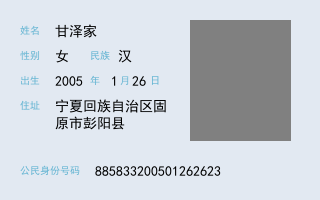

In [5]:
import PIL.Image
import PIL.ImageFont
import PIL.ImageDraw


def gen_image(name, gender, race, year, month, day, address, number):
    font = PIL.ImageFont.truetype('files/SIMHEI.TTF', size=10)

    image = PIL.Image.new('RGB', [320, 200], (226, 233, 242))

    draw = PIL.ImageDraw.Draw(image)
    draw.text(xy=[20, 25], text='姓名', font=font, fill=(99, 180, 210))
    draw.text(xy=[20, 50],
              text='性别          民族',
              font=font,
              fill=(99, 180, 210))
    draw.text(xy=[20, 75],
              text='出生          年    月    日',
              font=font,
              fill=(99, 180, 210))
    draw.text(xy=[20, 100], text='住址', font=font, fill=(99, 180, 210))
    draw.text(xy=[20, 165], text='公民身份号码', font=font, fill=(99, 180, 210))

    font = PIL.ImageFont.truetype('files/SIMHEI.TTF', size=14)

    draw.text(xy=[55, 23], text=name, font=font, fill=(0, 0, 0))
    draw.text(xy=[55, 48],
              text=gender + '       ' + race,
              font=font,
              fill=(0, 0, 0))

    month_s = str(month)
    if len(month_s) == 1:
        month_s = ' ' + month_s

    day_s = str(day)
    if len(day_s) == 1:
        day_s = ' ' + day_s

    draw.text(xy=[55, 73],
              text=str(year) + '   ' + month_s + '  ' + day_s,
              font=font,
              fill=(0, 0, 0))

    if len(address) > 8:
        address = '%s\n%s' % (address[:8], address[8:])

    draw.text(xy=[55, 98], text=address, font=font, fill=(0, 0, 0))

    draw.text(xy=[95, 163], text=number, font=font, fill=(0, 0, 0))

    draw.rectangle(xy=[190, 20, 290, 140], fill='gray')

    return image


gen_image(*gen_text())

In [6]:
def gen_box(name, gender, race, year, month, day, address, number):
    box = []

    x2 = 84
    if len(name) == 3:
        x2 = 98
    if len(name) == 4:
        x2 = 112

    box.append({'box': [53, 21, x2, 40], 'word': name, 'cls': 0})
    box.append({'box': [53, 46, 70, 66], 'word': gender, 'cls': 1})
    box.append({'box': [116, 46, 133, 66], 'word': race, 'cls': 2})
    box.append({'box': [53, 73, 85, 88], 'word': str(year), 'cls': 3})

    x1 = 102
    if month < 10:
        x1 = 108

    box.append({'box': [x1, 73, 119, 88], 'word': str(month), 'cls': 4})

    x1 = 130
    if day < 10:
        x1 = 136

    box.append({'box': [x1, 73, 147, 88], 'word': str(day), 'cls': 5})

    x2 = 53
    x2 += 15 * min(8, len(address))
    y2 = 115
    if len(address) > 8:
        y2 += 18

    box.append({'box': [53, 97, x2, y2], 'word': address, 'cls': 6})
    box.append({'box': [92, 162, 222, 179], 'word': number, 'cls': 7})

    return box


gen_box(*gen_text())

[{'box': [53, 21, 98, 40], 'word': '严建承', 'cls': 0},
 {'box': [53, 46, 70, 66], 'word': '女', 'cls': 1},
 {'box': [116, 46, 133, 66], 'word': '汉', 'cls': 2},
 {'box': [53, 73, 85, 88], 'word': '1975', 'cls': 3},
 {'box': [102, 73, 119, 88], 'word': '11', 'cls': 4},
 {'box': [130, 73, 147, 88], 'word': '13', 'cls': 5},
 {'box': [53, 97, 173, 133], 'word': '贵州省六盘水市钟山区', 'cls': 6},
 {'box': [92, 162, 222, 179], 'word': '820689197511139379', 'cls': 7}]

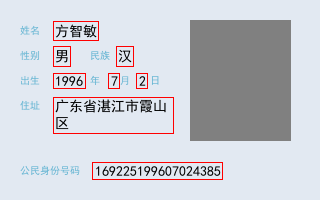

In [7]:
def show_box(image, box):
    draw = PIL.ImageDraw.Draw(image)

    for box in box:
        draw.rectangle(xy=box['box'], outline='red')

    return image


text = gen_text()
image = gen_image(*text)
box = gen_box(*text)

show_box(image, box)

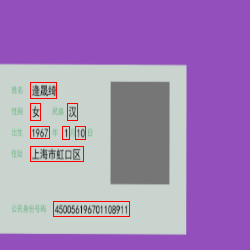

In [8]:
import albumentations
import numpy as np


def compose(image, box):

    def random_color():
        return random.randint(0, 255), random.randint(0, 255), random.randint(
            0, 255)

    transform = albumentations.Compose(
        [
            albumentations.CropAndPad(
                px=(50, 100), keep_size=False, pad_cval=[random_color()]),
            albumentations.RandomBrightnessContrast(brightness_limit=0.1),
            albumentations.ShiftScaleRotate(
                scale_limit=0.2, rotate_limit=8, p=1.0),
            albumentations.ColorJitter(),
            albumentations.AdvancedBlur(blur_limit=(1, 3)),
            albumentations.HueSaturationValue(),
            albumentations.GaussNoise(),
            albumentations.RandomSizedBBoxSafeCrop(250, 250),
        ],
        bbox_params=albumentations.BboxParams(format='pascal_voc'))

    image = np.array(image)
    bboxes = [[*i['box'], None] for i in box]

    transformed = transform(image=image, bboxes=bboxes)

    image = PIL.Image.fromarray(transformed['image'], 'RGB')

    for i in range(len(transformed['bboxes'])):
        bbox = transformed['bboxes'][i]
        box[i]['box'] = bbox[:4]

    return image, box


text = gen_text()
image = gen_image(*text)
box = gen_box(*text)

image, box = compose(image, box)

show_box(image, box)